In [2]:
import numpy
import ler


In [3]:
from ler.utils import load_json
unlensed_param = load_json('ler_data/unlensed_param.json')
lensed_param = load_json('ler_data/lensed_param.json')

numpy.random.seed(1234)
n= numpy.random.randint(100000)
print(n)
test = {}
lensed_param_keys = list(lensed_param.keys())
lensed_param_values = list(lensed_param.values())
print (unlensed_param.keys())
print (lensed_param.keys())
for i in range(len(lensed_param_keys)):
    if lensed_param_keys[i] != 'zl':
        test[lensed_param_keys[i]] = lensed_param_values[i][n]
print (test)




92975
dict_keys(['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'L1', 'H1', 'V1', 'optimal_snr_net'])
dict_keys(['zl', 'zs', 'sigma', 'q', 'theta_E', 'phi', 'e1', 'e2', 'gamma1', 'gamma2', 'gamma', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'n_images', 'effective_luminosity_distance', 'effective_geocent_time', 'optimal_snr_net', 'L1', 'H1', 'V1'])
{'zs': 6.947267426294125, 'sigma': 168.21898572557296, 'q': 0.7779388058391365, 'theta_E': 8.678318976285953e-07, 'phi': 6.1489276678131874, 'e1': 0.12042249182185884, 'e2': -0.03313549471527121, 'gamma1': -0.07085642001127218, 'gamma2': 0.04181953498673738, 'gamma': 2.239225339697197, 'ra': 1.5203871785504248, 'dec': 1.142595481954812, 'phase': 4.046864140592075, 'psi': 1.8009788371515456, 'theta_jn': 0.685109

In [161]:
import bilby
import numpy as np
import matplotlib.pyplot as plt
from golum.tools import waveformmodels, utils 
sampling_frequency = 2048.
duration = 4.
event1_parameters = {'mass_1': 36.0, 'mass_2': 29.0, 'a_1': 0.4, 
                     'a_2': 0.3, 'tilt_1': 0.5, 'tilt_2': 1.0, 
                     'phi_12': 1.7, 'phi_jl': 0.3, 
                     'luminosity_distance': 1500.0, 
                     'theta_jn': 0.4, 'psi': 2.659, 'phase': 1.3,
                     'ra': 1.375, 'dec': -1.2108, 
                     'geocent_time': 1126259642.413, 'n_phase' : 0.5}
lensing_parameters = dict(relative_magnification = 2., delta_t = 14*3600, 
                         delta_n = 1.)
lensing_parameters1 = dict(relative_magnification = 2., delta_t = 14*3600, 
                         delta_n = 0.)

17:41 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: golum.tools.waveformmodels.lensed_bbh_model
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
17:41 bilby INFO    : Injected signal in H1:
17:41 bilby INFO    :   optimal SNR = 15.95
17:41 bilby INFO    :   matched filter SNR = 15.95+0.00j
17:41 bilby INFO    :   mass_1 = 36.0
17:41 bilby INFO    :   mass_2 = 29.0
17:41 bilby INFO    :   a_1 = 0.4
17:41 bilby INFO    :   a_2 = 0.3
17:41 bilby INFO    :   tilt_1 = 0.5
17:41 bilby INFO    :   tilt_2 = 1.0
17:41 bilby INFO    :   phi_12 = 1.7
17:41 bilby INFO    :   phi_jl = 0.3
17:41 bilby INFO    :   luminosity_distance = 2121.320343559643
17:41 bilby INFO    :   theta_jn = 0.4
17:41 bilby INFO    :   psi = 2.659
17:41 bilby INFO    :   phase = 1.3
17:41 bilby INFO    :   ra = 1.375
17:41 bilby INFO    :   dec = -1.2108
17:41 bilby INFO    :   geocent_time = 1126310042.413
17:41 

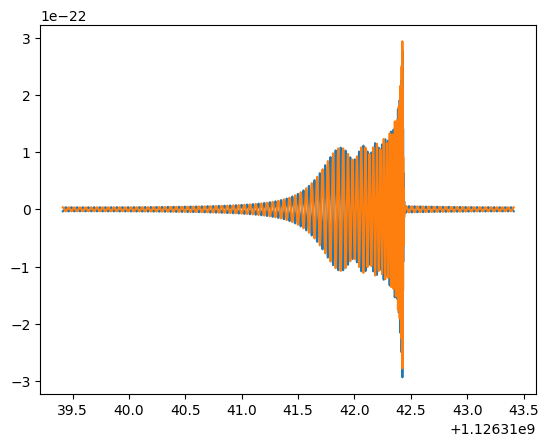

In [164]:
from bilby.gw.detector import networks
injection_parameters = utils.make_bbh_parameters_from_first_image_parameters_and_lensing_parameters(event1_parameters,
                                                                                                    lensing_parameters)
injection_parameters1 = utils.make_bbh_parameters_from_first_image_parameters_and_lensing_parameters(event1_parameters, lensing_parameters1)
waveform_arguments = dict(waveform_approximant = 'IMRPhenomPv2',
                          reference_frequency = 50.,
                          minimum_frequency = 20.) 
# WF for injection 
injection_wf_gen = bilby.gw.WaveformGenerator(duration = duration,
                                              sampling_frequency = sampling_frequency,
                                              frequency_domain_source_model = waveformmodels.lensed_bbh_model, 
                                              waveform_arguments = waveform_arguments)

# do the lensed injection in a zero noise ifo
ifo = networks.get_empty_interferometer("H1")
ifo1 = networks.get_empty_interferometer("H1")
ifo.set_strain_data_from_zero_noise(sampling_frequency = sampling_frequency, 
                                                   duration = duration, 
                                                   start_time = injection_parameters['geocent_time'] - 3.)
ifo.inject_signal(waveform_generator = injection_wf_gen,
                   parameters = injection_parameters)
ifo1.set_strain_data_from_zero_noise(sampling_frequency = sampling_frequency,
                                                    duration = duration,
                                                    start_time = injection_parameters1['geocent_time'] - 3.)
ifo1.inject_signal(waveform_generator = injection_wf_gen,
                    parameters = injection_parameters1)
# plot the injection signal in time domain
plt.plot(ifo.strain_data.time_array, ifo.strain_data.time_domain_strain)
plt.plot(ifo1.strain_data.time_array, ifo1.strain_data.time_domain_strain)







